<a href="https://colab.research.google.com/github/ray1422/Fantastic-Filter-Professional-Plus/blob/master/Fantastic-Filter-Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fantastic Filter Notebook

## Install Dependencies

In [0]:
!pip install tensorflow-gpu==2.1.0

     |████████████████████████████████| 421.8MB 34kB/s 
     |████████████████████████████████| 3.9MB 54.1MB/s 
     |████████████████████████████████| 450kB 47.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=4a8637b2714c617a836b496fb5e5434de03256ac0e24cf756ed00c6520b79214
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: gast 0.3.

## Download "Fantastic Filter" Model

In [0]:
import os
if not os.path.isfile("FF_Model.tar.gz"):
    !wget -O FF_Model.tar.gz https://github.com/ray1422/Fantastic-Filter-Professional-Plus/releases/download/v0.0.1/FF_Model.tar.gz
else:
    print("Model has been download!")

if not os.path.isdir("FF_Model"):
    !tar -zxf FF_Model.tar.gz
    !ls
else:
    print("Model exist!")

Model has been download!
Model exist!


## Download Image

--2020-04-13 18:37:24--  https://icdn2.digitaltrends.com/image/digitaltrends/galaxy-s9-camera-low-light-palau-nacional-1500x1000.jpg
Resolving icdn2.digitaltrends.com (icdn2.digitaltrends.com)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to icdn2.digitaltrends.com (icdn2.digitaltrends.com)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 334305 (326K) [image/jpeg]
Saving to: ‘galaxy-s9-camera-low-light-palau-nacional-1500x1000.jpg’

galaxy-s9-camera-lo 100%[===================>] 326.47K  --.-KB/s    in 0.007s  

2020-04-13 18:37:24 (46.0 MB/s) - ‘galaxy-s9-camera-low-light-palau-nacional-1500x1000.jpg’ saved [334305/334305]

new size 1920x1276


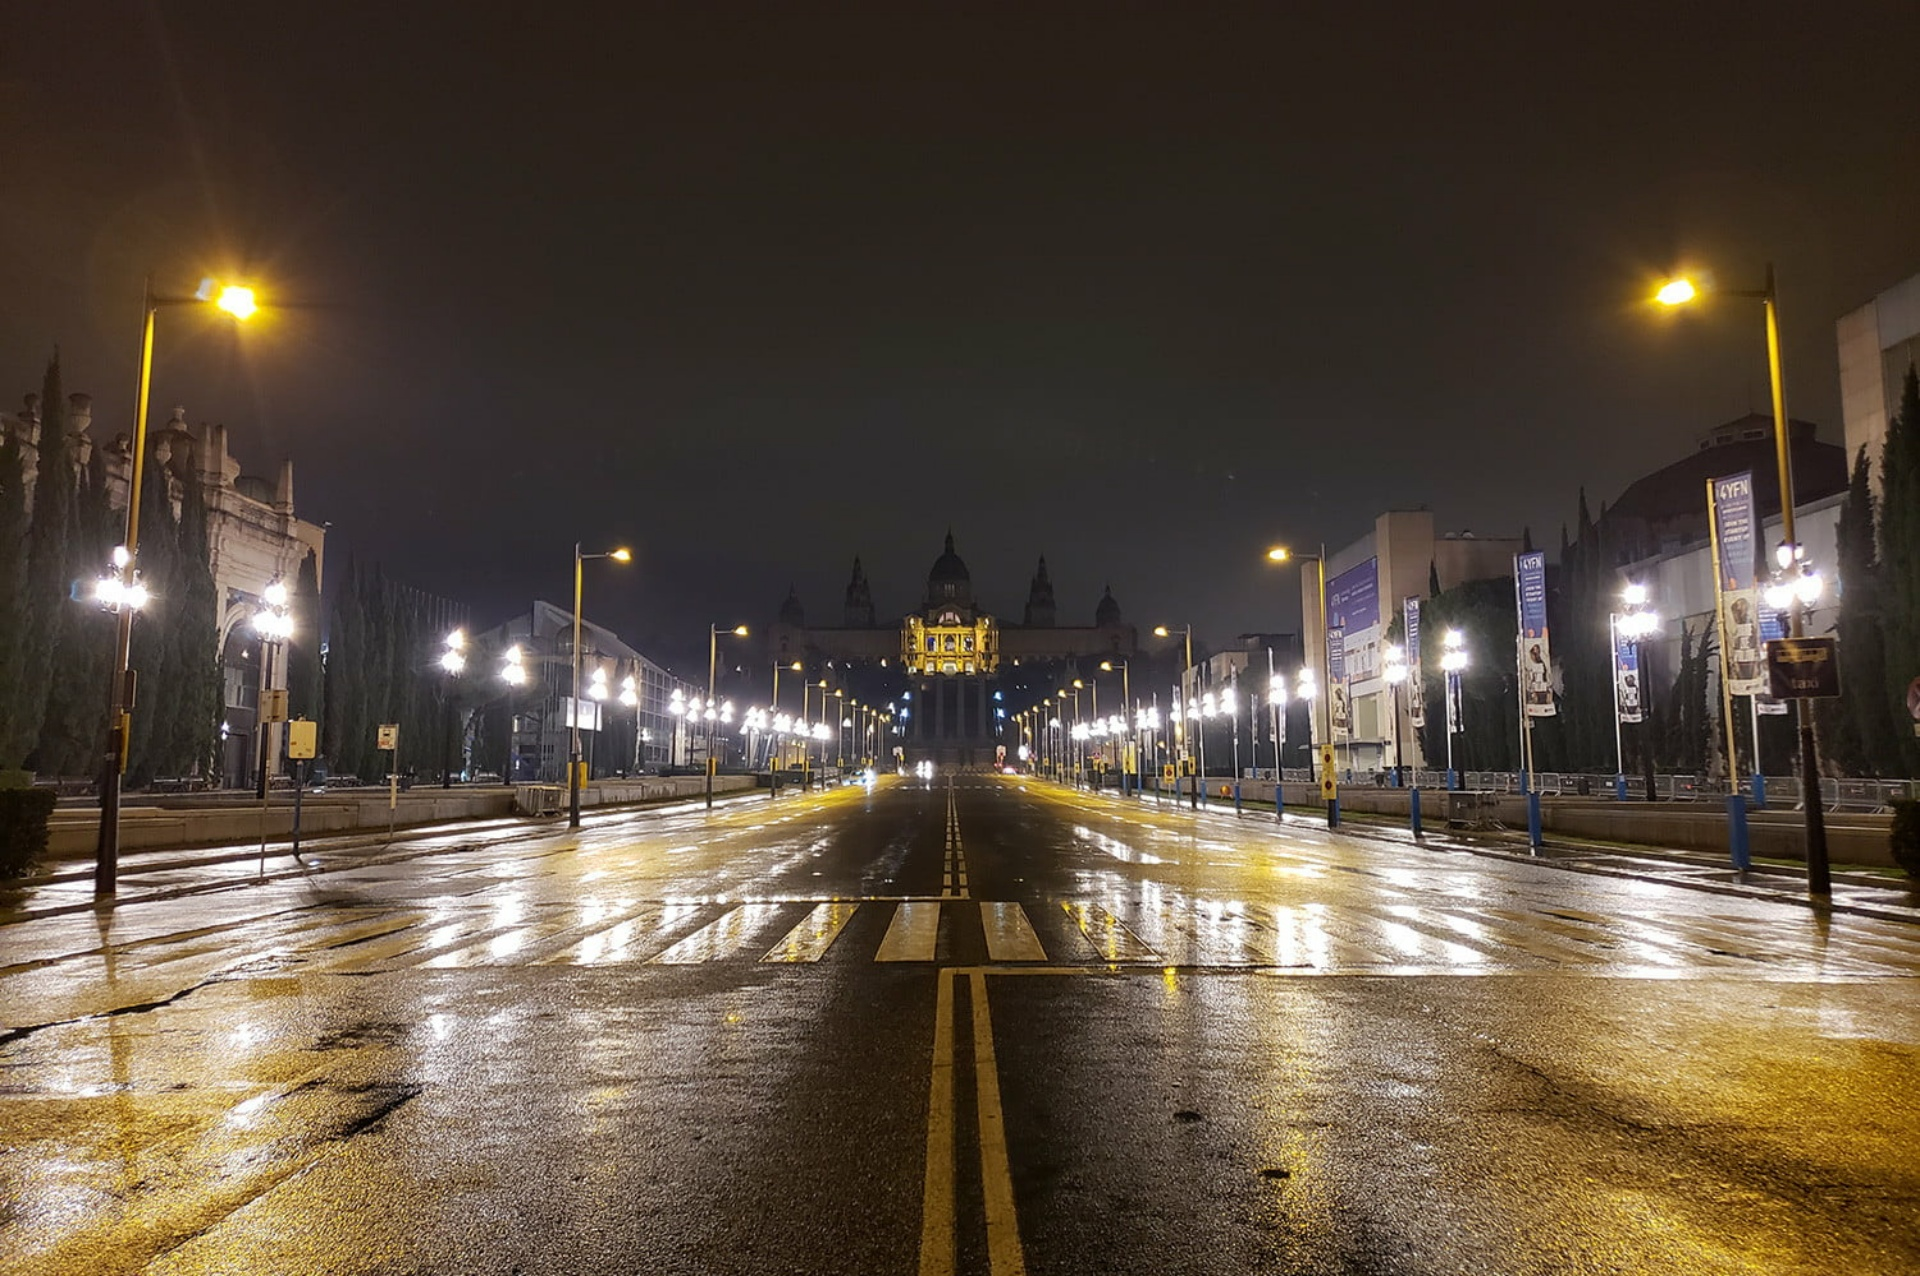

In [0]:
import os
import tensorflow as tf
from IPython.display import Image

image_url = "https://icdn2.digitaltrends.com/image/digitaltrends/galaxy-s9-camera-low-light-palau-nacional-1500x1000.jpg"  # @param {type:"string"}
!wget {image_url}
filename = os.path.basename(image_url)
image = tf.image.decode_jpeg(tf.io.read_file(filename))
!rm {filename}
max_side = 1920 # @param {type: "integer"}
max_side -= max_side % 8
h, w, _ = tf.shape(image).numpy()
if h > w:
    w = int(max_side / h * w)
    w -= w % 8
    h = max_side
    image = tf.resize(image, (h, w))
else:
    h = int(max_side / w * h)
    h -= w % 8
    w = max_side
    image = tf.image.resize(image, (h, w))
image = tf.cast(image, dtype=tf.uint8)
print(f"new size {w}x{h}")
display(Image(data=tf.image.encode_jpeg(image).numpy()))

## Let AI Cast Magic

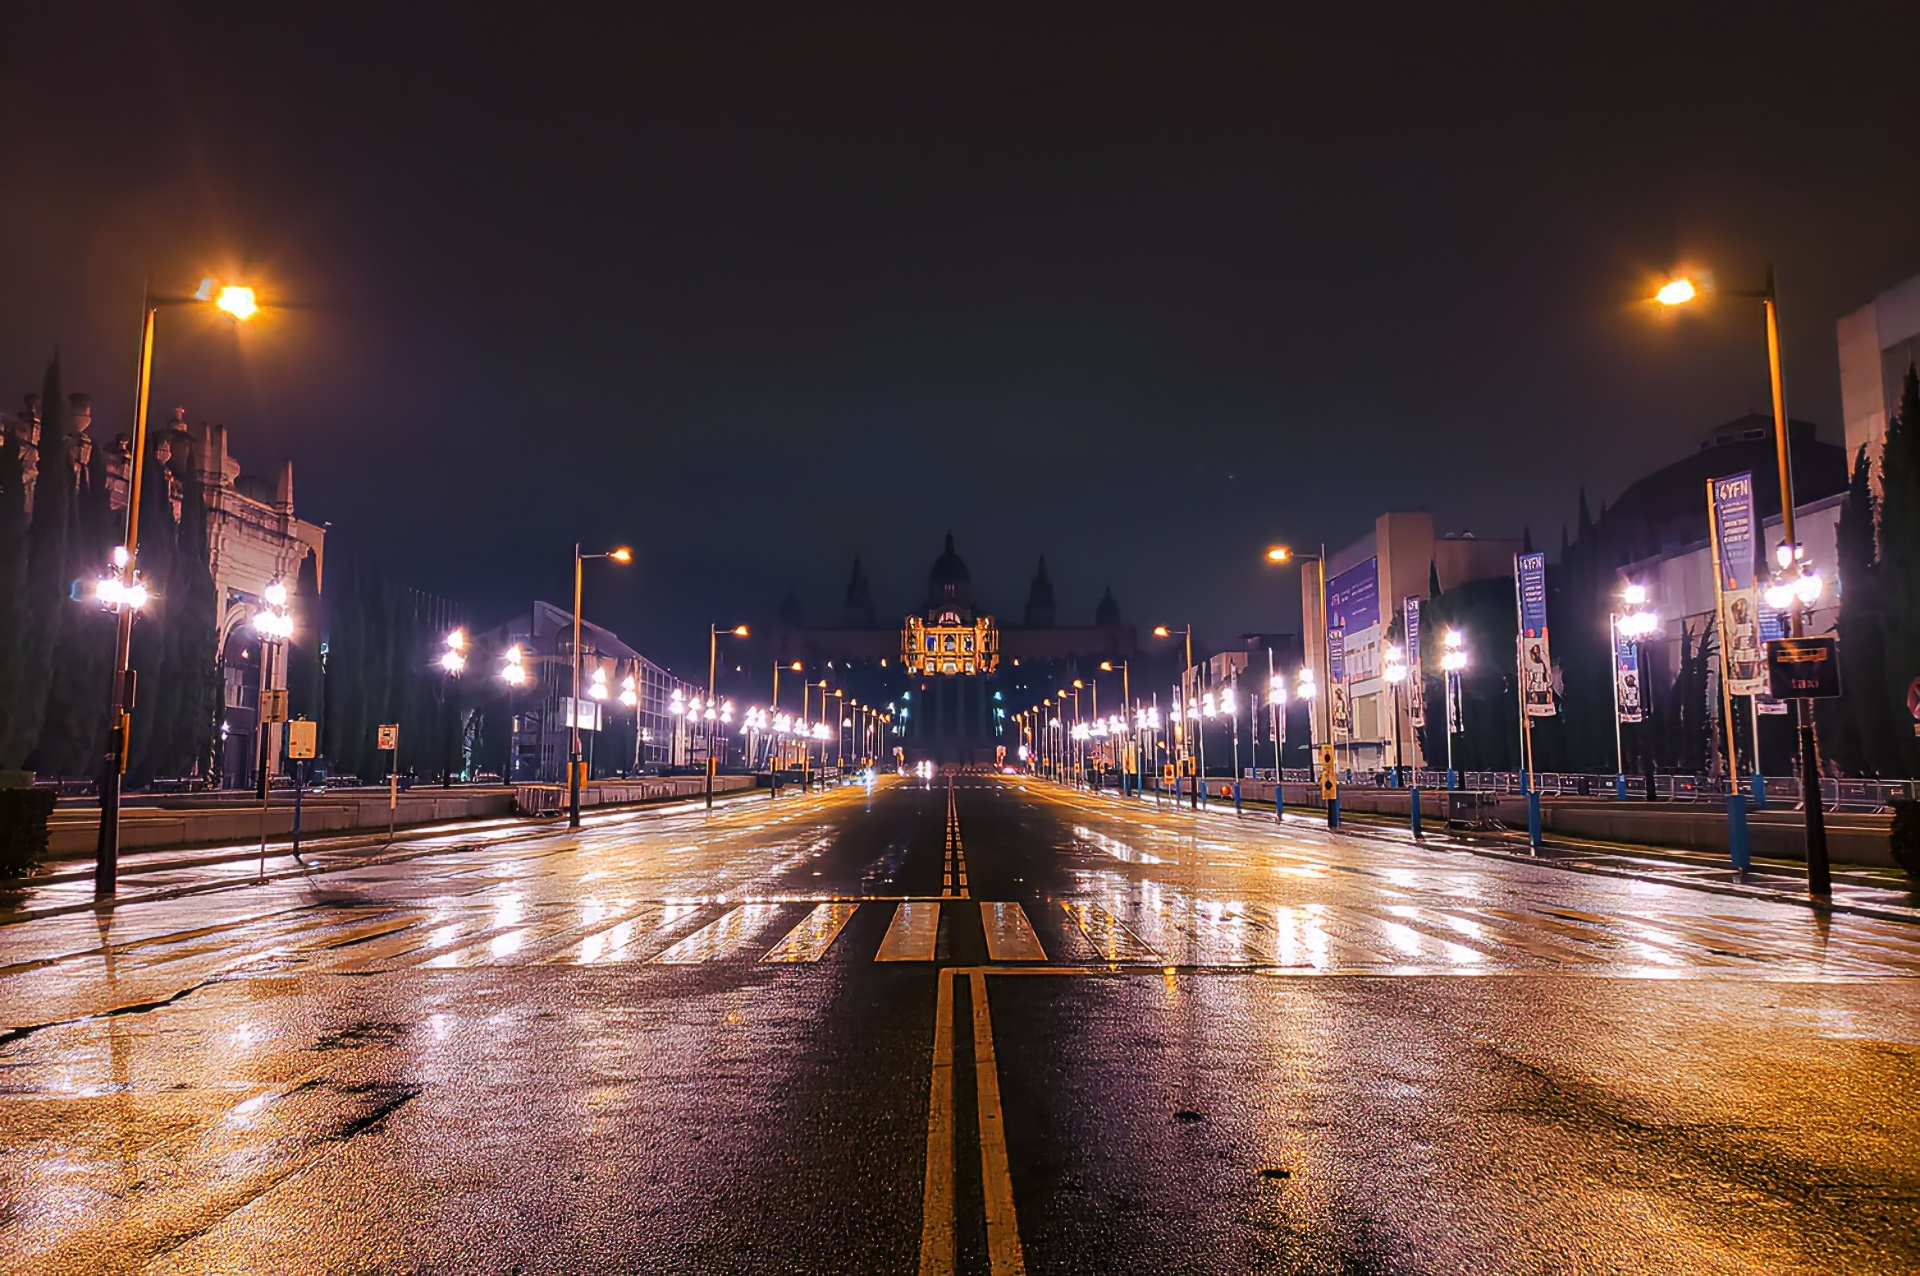

In [0]:
import tensorflow as tf
model = tf.saved_model.load("FF_Model")
enhanced = model.enhance(image)
display(Image(data=tf.image.encode_jpeg(enhanced).numpy()))